<a href="https://colab.research.google.com/github/spacewal/Neural-Network-Project-for-Regression-and-Binary-Classification/blob/main/Neural_Network_Project_for_Regression_and_Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/spacewal/Neural-Network-Project-for-Regression-and-Binary-Classification/main/Apple%20Dataset.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099058,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093890,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086999,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089152,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091737,73449600


In [3]:
to_drop= ['Date']
df = df.drop(to_drop, axis=1)
df.head()

,Open,High,Low,Close,Adj Close,Volume
0,0.128348,0.128906,0.128348,0.128348,0.099058,469033600
1,0.122210,0.122210,0.121652,0.121652,0.093890,175884800
2,0.113281,0.113281,0.112723,0.112723,0.086999,105728000
3,0.115513,0.116071,0.115513,0.115513,0.089152,86441600
4,0.118862,0.119420,0.118862,0.118862,0.091737,73449600


In [4]:
# Assuming 'Adj Close' is the adjusted closing price
df['EMA12'] = df['Adj Close'].ewm(span=12, adjust=False).mean()
df['EMA26'] = df['Adj Close'].ewm(span=26, adjust=False).mean()
df.head()

,Open,High,Low,Close,Adj Close,Volume,EMA12,EMA26
0,0.128348,0.128906,0.128348,0.128348,0.099058,469033600,0.099058,0.099058
1,0.122210,0.122210,0.121652,0.121652,0.093890,175884800,0.098263,0.098675
2,0.113281,0.113281,0.112723,0.112723,0.086999,105728000,0.096530,0.097810
3,0.115513,0.116071,0.115513,0.115513,0.089152,86441600,0.095395,0.097169
4,0.118862,0.119420,0.118862,0.118862,0.091737,73449600,0.094832,0.096767


In [5]:
# Calculate MACD
df['MACD'] = df['EMA12'] - df['EMA26']
# Calculate Signal
df['Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()
df.head()

,Open,High,Low,Close,Adj Close,Volume,EMA12,EMA26,MACD,Signal
0,0.128348,0.128906,0.128348,0.128348,0.099058,469033600,0.099058,0.099058,0.000000,0.000000
1,0.122210,0.122210,0.121652,0.121652,0.093890,175884800,0.098263,0.098675,-0.000412,-0.000082
2,0.113281,0.113281,0.112723,0.112723,0.086999,105728000,0.096530,0.097810,-0.001280,-0.000322
3,0.115513,0.116071,0.115513,0.115513,0.089152,86441600,0.095395,0.097169,-0.001774,-0.000612
4,0.118862,0.119420,0.118862,0.118862,0.091737,73449600,0.094832,0.096767,-0.001934,-0.000877


In [6]:
# Calculate the differences in price
delta = df['Adj Close'].diff()

# Get gains (up) and losses (down)
up, down = delta.clip(lower=0), delta.clip(upper=0).abs()

# Calculate the Exponential Moving Averages of ups and downs
roll_up = up.ewm(span=14).mean()
roll_down = down.ewm(span=14).mean()

# Calculate the RSI based on EMAs
RS = roll_up / roll_down
df['RSI'] = 100.0 - (100.0 / (1.0 + RS))

df.head()

,Open,High,Low,Close,Adj Close,Volume,EMA12,EMA26,MACD,Signal,RSI
0,0.128348,0.128906,0.128348,0.128348,0.099058,469033600,0.099058,0.099058,0.000000,0.000000,NaN
1,0.122210,0.122210,0.121652,0.121652,0.093890,175884800,0.098263,0.098675,-0.000412,-0.000082,0.000000
2,0.113281,0.113281,0.112723,0.112723,0.086999,105728000,0.096530,0.097810,-0.001280,-0.000322,0.000000
3,0.115513,0.116071,0.115513,0.115513,0.089152,86441600,0.095395,0.097169,-0.001774,-0.000612,17.931293
4,0.118862,0.119420,0.118862,0.118862,0.091737,73449600,0.094832,0.096767,-0.001934,-0.000877,34.261625


In [7]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
EMA12        float64
EMA26        float64
MACD         float64
Signal       float64
RSI          float64
dtype: object

In [8]:
df.sample(15)

,Open,High,Low,Close,Adj Close,Volume,EMA12,EMA26,MACD,Signal,RSI
7155,4.522143,4.542857,4.411071,4.478571,3.786421,945156800,3.613721,3.435427,0.178294,0.177107,73.069363
7158,4.405357,4.507500,4.402143,4.425000,3.741129,455856800,3.667204,3.500172,0.167032,0.174176,63.866636
1741,0.345982,0.352679,0.334821,0.345982,0.267778,188160000,0.268504,0.300099,-0.031595,-0.029677,47.624153
3625,0.340402,0.351563,0.338170,0.342634,0.287199,208812800,0.278018,0.278271,-0.000253,-0.004190,63.146795
9311,43.375000,43.625000,43.349998,43.492500,41.019077,67928400,40.211099,39.047856,1.163244,0.929590,73.764466
8194,15.883214,16.038570,15.600000,15.674643,13.536788,450153200,13.677347,13.622873,0.054474,0.092582,40.986074
10028,104.540001,110.190002,103.099998,110.080002,107.699646,195713800,111.446236,112.352772,-0.906536,1.192839,38.949468
7690,12.077500,12.079286,11.853571,11.858571,10.025865,529785200,10.255461,10.287236,-0.031776,-0.027316,34.210988
6833,6.285714,6.351786,6.071429,6.167500,5.214329,1232285600,5.517205,5.571245,-0.054040,0.033539,30.870697
10523,154.639999,156.360001,152.679993,154.460007,152.944199,84923800,157.842425,159.314575,-1.472149,0.574304,26.652484


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10954 entries, 0 to 10953
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10954 non-null  float64
 1   High       10954 non-null  float64
 2   Low        10954 non-null  float64
 3   Close      10954 non-null  float64
 4   Adj Close  10954 non-null  float64
 5   Volume     10954 non-null  int64  
 6   EMA12      10954 non-null  float64
 7   EMA26      10954 non-null  float64
 8   MACD       10954 non-null  float64
 9   Signal     10954 non-null  float64
 10  RSI        10953 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 941.5 KB


In [10]:
# prompt: show me the nulls in all columns and that are Nan

import numpy as np

# Check for null values in each column
null_values = df.isnull().sum()

# Select columns with null values
columns_with_nulls = null_values[null_values > 0].index.tolist()

# Print the number of null values in each column
print(f"Number of null values in each column:")
print(null_values[columns_with_nulls])

# Select rows where any value is NaN
rows_with_nan = df[df.isnull().any(axis=1)]

# Print the number of rows with NaN values
print(f"\nNumber of rows with NaN values: {len(rows_with_nan)}")

# Print the rows with NaN values
print(rows_with_nan)


Number of null values in each column:
RSI    1
dtype: int64

Number of rows with NaN values: 1
       Open      High       Low     Close  Adj Close     Volume     EMA12  \
0  0.128348  0.128906  0.128348  0.128348   0.099058  469033600  0.099058   

      EMA26  MACD  Signal  RSI  
0  0.099058   0.0     0.0  NaN  


In [11]:
# prompt: drop rows with null and NaN

df = df.dropna()


In [12]:
# prompt: check if null or NaN are present in df

df.isnull().sum().sum()


0

In [13]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler

In [14]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,EMA12,EMA26,MACD,Signal,RSI
1,0.122210,0.122210,0.121652,0.121652,0.093890,175884800,0.098263,0.098675,-0.000412,-0.000082,0.000000
2,0.113281,0.113281,0.112723,0.112723,0.086999,105728000,0.096530,0.097810,-0.001280,-0.000322,0.000000
3,0.115513,0.116071,0.115513,0.115513,0.089152,86441600,0.095395,0.097169,-0.001774,-0.000612,17.931293
4,0.118862,0.119420,0.118862,0.118862,0.091737,73449600,0.094832,0.096767,-0.001934,-0.000877,34.261625
5,0.126116,0.126674,0.126116,0.126116,0.097335,48630400,0.095217,0.096809,-0.001591,-0.001020,56.092675


In [15]:
from sklearn.model_selection import train_test_split


X = df.drop('Close', axis=1)
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [16]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler

# Initialize the transformer with the correct columns (excluding 'Close')
transformer = make_column_transformer(
    (MinMaxScaler(), X.columns)  # Use X.columns instead of df.columns
)

# Fit and transform as before
transformer.fit(X_train)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

# Train a Regression Model with TensorFlow

In [17]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

In [18]:
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [19]:
tf.random.set_seed(42)

model = Sequential([
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)
])

model.compile(
    loss=rmse,
    optimizer=Adam(),
    metrics=[rmse]
)

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
274/274 [==============================] - 2s 3ms/step - loss: 7.1893 - rmse: 7.1846
Epoch 2/100
274/274 [==============================] - 1s 3ms/step - loss: 0.5076 - rmse: 0.5074
Epoch 3/100
274/274 [==============================] - 1s 3ms/step - loss: 0.5667 - rmse: 0.5665
Epoch 4/100
274/274 [==============================] - 1s 3ms/step - loss: 0.5445 - rmse: 0.5445
Epoch 5/100
274/274 [==============================] - 1s 3ms/step - loss: 0.5196 - rmse: 0.5201
Epoch 6/100
274/274 [==============================] - 1s 3ms/step - loss: 0.5507 - rmse: 0.5508
Epoch 7/100
274/274 [==============================] - 1s 3ms/step - loss: 0.5200 - rmse: 0.5199
Epoch 8/100
274/274 [==============================] - 1s 3ms/step - loss: 0.5471 - rmse: 0.5472
Epoch 9/100
274/274 [==============================] - 1s 3ms/step - loss: 0.4915 - rmse: 0.4915
Epoch 10/100
274/274 [==============================] - 1s 3ms/step - loss: 0.4511 - rmse: 0.4510
Epoch 11/100
274/274 [=======

In [20]:
predictions = model.predict(X_test)
predictions[:5]

69/69 [==============================] - 0s 2ms/step


array([[ 0.26344204],
       [34.46955   ],
       [ 0.46707493],
       [ 2.9658983 ],
       [ 0.08844113]], dtype=float32)

In [21]:
predictions = np.ravel(predictions)
predictions[:5]

array([ 0.26344204, 34.46955   ,  0.46707493,  2.9658983 ,  0.08844113],
      dtype=float32)

In [22]:
rmse(y_test, predictions).numpy()

0.4855359441778027

# Build a Classifier

In [23]:
df_2 = pd.read_csv('https://raw.githubusercontent.com/spacewal/Neural-Network-Project-for-Regression-and-Binary-Classification/main/Apple%20Dataset.csv')

In [24]:
import numpy as np
import pandas as pd

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10953 entries, 1 to 10953
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10953 non-null  float64
 1   High       10953 non-null  float64
 2   Low        10953 non-null  float64
 3   Close      10953 non-null  float64
 4   Adj Close  10953 non-null  float64
 5   Volume     10953 non-null  int64  
 6   EMA12      10953 non-null  float64
 7   EMA26      10953 non-null  float64
 8   MACD       10953 non-null  float64
 9   Signal     10953 non-null  float64
 10  RSI        10953 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 1.0 MB


In [26]:
df = df.dropna()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10953 entries, 1 to 10953
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10953 non-null  float64
 1   High       10953 non-null  float64
 2   Low        10953 non-null  float64
 3   Close      10953 non-null  float64
 4   Adj Close  10953 non-null  float64
 5   Volume     10953 non-null  int64  
 6   EMA12      10953 non-null  float64
 7   EMA26      10953 non-null  float64
 8   MACD       10953 non-null  float64
 9   Signal     10953 non-null  float64
 10  RSI        10953 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 1.0 MB


In [28]:
df.sample(7)

,Open,High,Low,Close,Adj Close,Volume,EMA12,EMA26,MACD,Signal,RSI
9875,80.367500,81.805000,80.367500,81.800003,79.671455,113730400,77.790089,76.157532,1.632557,1.778523,64.512776
1301,0.106027,0.106585,0.104911,0.106027,0.081831,197164800,0.080410,0.078995,0.001414,0.001555,59.205881
9204,36.790001,36.862499,36.287498,36.647499,34.304829,136661600,35.388961,35.359092,0.029869,0.325442,28.985293
9619,43.662498,43.892502,43.212502,43.560001,41.699524,112958400,39.438920,38.754652,0.684268,-0.015387,81.097986
6881,4.786071,5.030357,4.772857,4.983214,4.213071,1066920400,3.915067,3.908532,0.006535,-0.066665,73.235828
6556,3.281429,3.287500,3.232143,3.254286,2.751345,709536800,2.701493,2.602065,0.099428,0.094410,69.005472
5650,0.254464,0.256964,0.250000,0.256429,0.216799,342759200,0.209225,0.210729,-0.001504,-0.003320,68.381264


In [29]:
# Shift the 'Close' column up to compare today's closing price with tomorrow's closing price
df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)

In [30]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,EMA12,EMA26,MACD,Signal,RSI,Target
1,0.122210,0.122210,0.121652,0.121652,0.093890,175884800,0.098263,0.098675,-0.000412,-0.000082,0.000000,0
2,0.113281,0.113281,0.112723,0.112723,0.086999,105728000,0.096530,0.097810,-0.001280,-0.000322,0.000000,1
3,0.115513,0.116071,0.115513,0.115513,0.089152,86441600,0.095395,0.097169,-0.001774,-0.000612,17.931293,1
4,0.118862,0.119420,0.118862,0.118862,0.091737,73449600,0.094832,0.096767,-0.001934,-0.000877,34.261625,1
5,0.126116,0.126674,0.126116,0.126116,0.097335,48630400,0.095217,0.096809,-0.001591,-0.001020,56.092675,1


Count of occurrences for 'Target':
Target
0    5516
1    5437
Name: count, dtype: int64


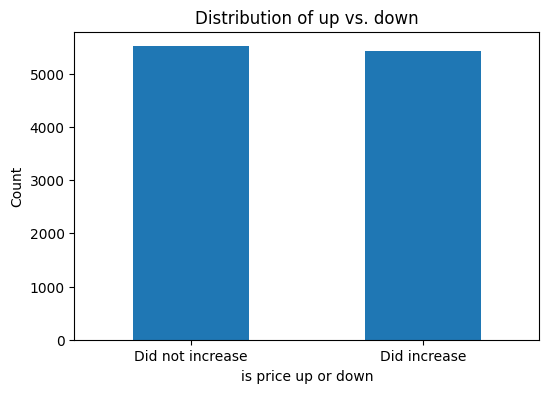

In [31]:
# Check if the 'Target' target is balanced
Target_counts = df['Target'].value_counts()

# Display the results
print("Count of occurrences for 'Target':")
print(Target_counts)


# Plot the distribution to visually inspect the balance
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
Target_counts.plot(kind='bar')
plt.title('Distribution of up vs. down')
plt.xlabel('is price up or down')
plt.ylabel('Count')
plt.xticks([0, 1], ['Did not increase', 'Did increase'], rotation=0)
plt.show()

In [32]:
from sklearn.model_selection import train_test_split


X = df.drop('Target', axis=1)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, random_state=42
)

In [33]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,EMA12,EMA26,MACD,Signal,RSI,Target
1,0.122210,0.122210,0.121652,0.121652,0.093890,175884800,0.098263,0.098675,-0.000412,-0.000082,0.000000,0
2,0.113281,0.113281,0.112723,0.112723,0.086999,105728000,0.096530,0.097810,-0.001280,-0.000322,0.000000,1
3,0.115513,0.116071,0.115513,0.115513,0.089152,86441600,0.095395,0.097169,-0.001774,-0.000612,17.931293,1
4,0.118862,0.119420,0.118862,0.118862,0.091737,73449600,0.094832,0.096767,-0.001934,-0.000877,34.261625,1
5,0.126116,0.126674,0.126116,0.126116,0.097335,48630400,0.095217,0.096809,-0.001591,-0.001020,56.092675,1


In [34]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
import tensorflow as tf
tf.random.set_seed(42)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

history = model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
274/274 [==============================] - 2s 3ms/step - loss: 0.6954 - accuracy: 0.5168 - precision: 0.5151 - recall: 0.5076
Epoch 2/100
274/274 [==============================] - 1s 2ms/step - loss: 0.6927 - accuracy: 0.5169 - precision: 0.5156 - recall: 0.4952
Epoch 3/100
274/274 [==============================] - 1s 2ms/step - loss: 0.6927 - accuracy: 0.5231 - precision: 0.5186 - recall: 0.5910
Epoch 4/100
274/274 [==============================] - 1s 2ms/step - loss: 0.6918 - accuracy: 0.5296 - precision: 0.5253 - recall: 0.5747
Epoch 5/100
274/274 [==============================] - 1s 3ms/step - loss: 0.6916 - accuracy: 0.5233 - precision: 0.5195 - recall: 0.5694
Epoch 6/100
274/274 [==============================] - 1s 2ms/step - loss: 0.6919 - accuracy: 0.5245 - precision: 0.5211 - recall: 0.5614
Epoch 7/100
274/274 [==============================] - 1s 2ms/step - loss: 0.6918 - accuracy: 0.5213 - precision: 0.5190 - recall: 0.5319
Epoch 8/100
274/274 [=============

In [36]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

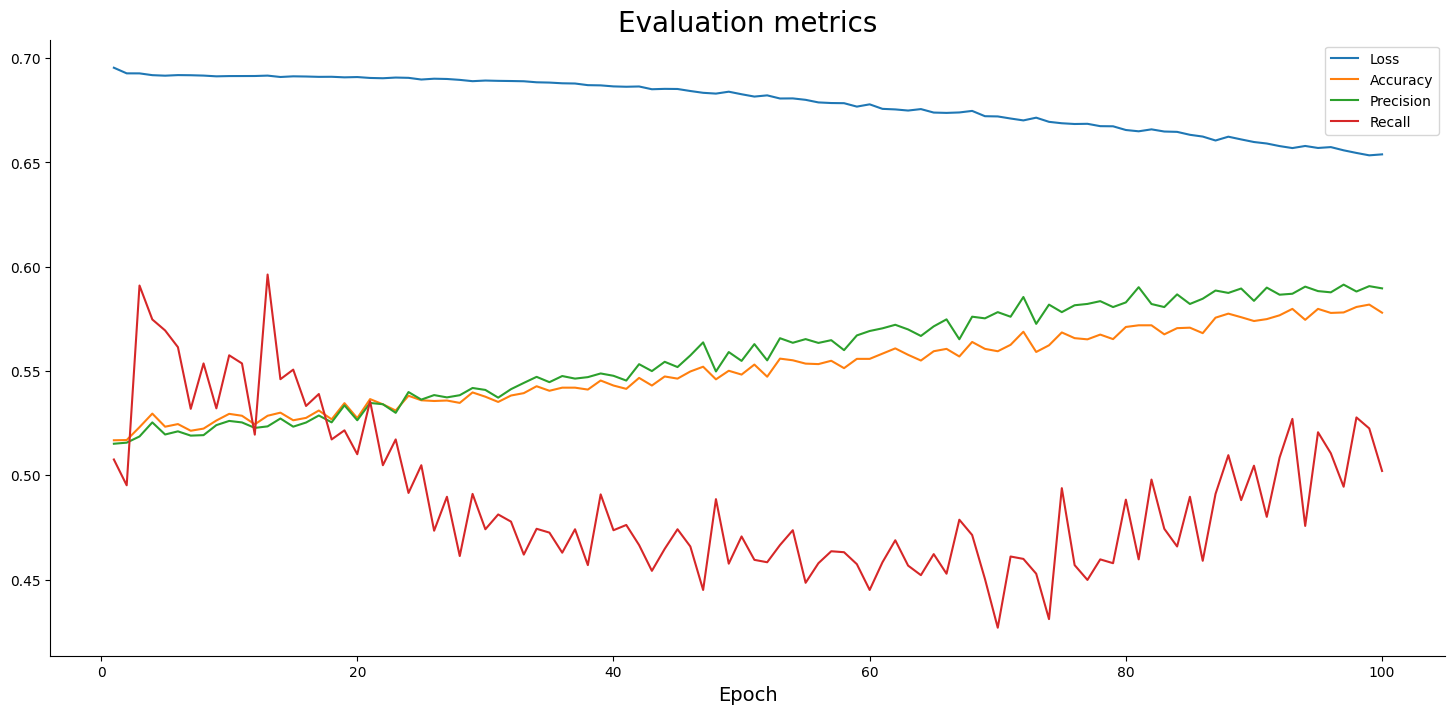

In [37]:
plt.plot(
    np.arange(1, 101),
    history.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, 101),
    history.history['accuracy'], label='Accuracy'
)
plt.plot(
    np.arange(1, 101),
    history.history['precision'], label='Precision'
)
plt.plot(
    np.arange(1, 101),
    history.history['recall'], label='Recall'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

In [38]:
predictions = model.predict(X_test_scaled)

69/69 [==============================] - 0s 2ms/step


In [39]:
prediction_classes = [
    1 if prob > 0.5 else 0 for prob in np.ravel(predictions)
]

In [40]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, prediction_classes))

[[664 454]
 [559 514]]


In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score


print(f'Accuracy: {accuracy_score(y_test, prediction_classes):.2f}')
print(f'Precision: {precision_score(y_test, prediction_classes):.2f}')
print(f'Recall: {recall_score(y_test, prediction_classes):.2f}')

Accuracy: 0.54
Precision: 0.53
Recall: 0.48
